In [0]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
%matplotlib inline

# Визуализация корреляции в python

In [59]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df[:3]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0


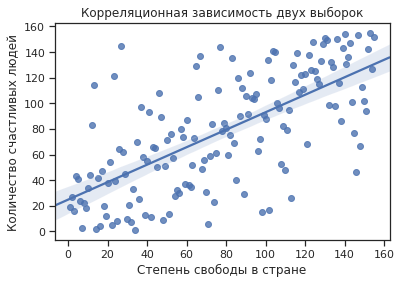

In [60]:
freedom = df['Freedom']
positive = df['Positive affect']
sns.regplot(x= freedom, y=positive,data=df, fit_reg=True)
plt.xlabel('Степень свободы в стране')
plt.ylabel('Количество счастливых людей')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

Корреляция **jointplot** с добавлением регрессионного анализа.

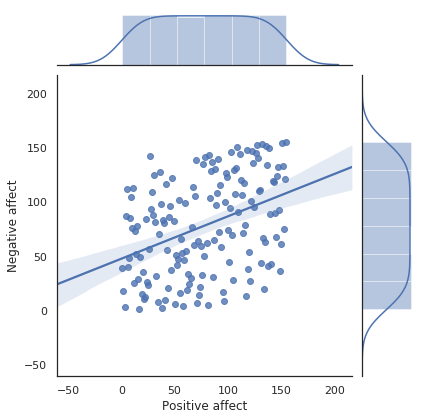

In [61]:
corruption = df['Corruption']
negative = df['Negative affect']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=positive, y=negative, data=df, kind='reg')
plt.show()

# Примеры матрицы корреляцийдля 3 выборок

Загрузим датасет цветов ириса. В этом датасете всего 3 класса различных цветов. Каждый из классов отличается по 4 параметрам (features): 
1.  sepal length in cm 
2.  sepal width in cm 
3.  petal length in cm 
4.  petal width in cm 

Названия классов: 
*  Iris Setosa 
*  Iris Versicolour 
*  Iris Virginica

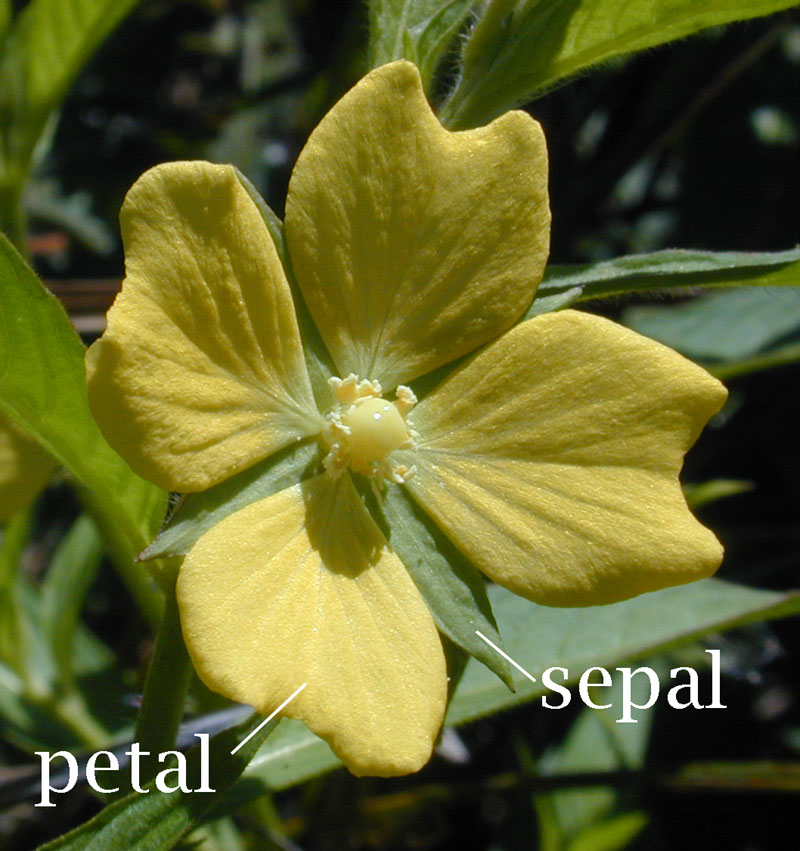

In [0]:
from IPython.display import Image
Image('https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg', width=300, height=300)

Загрузим датасет:

In [38]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None, names=["Sepal length", "Sepal width", "Petal length", "Petal width", 'species'])
data.head()

,Sepal length,Sepal width,Petal length,Petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Построим попарные графики для выборок, а также частотные графики на главной диагонали  с помощью метода **pairplot**.

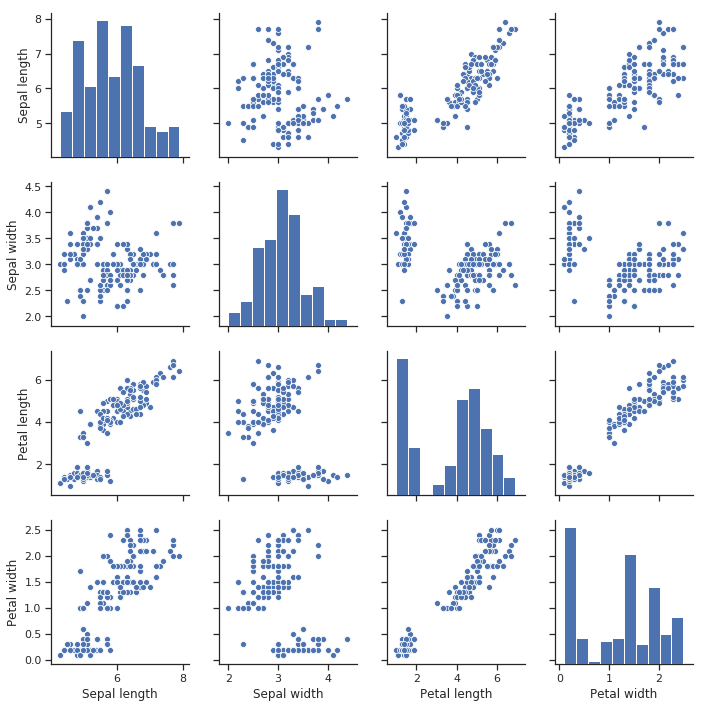

In [67]:
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(data)

Проведем классификационный анализ всех выборок попарно с помощью параметра hue, где мы указываем наименование классов:

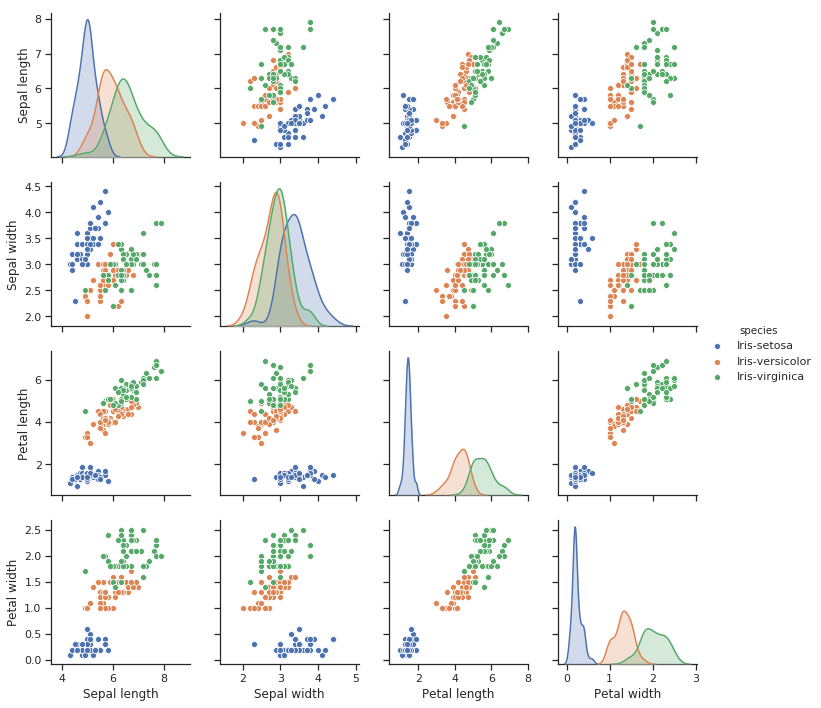

In [40]:
fig = sns.pairplot(data=data, hue='species')
plt.show()

Матрица ковариаций для 4-мерного пространства:

$$
\Sigma = \begin{bmatrix}
    \sigma_{1}^2  &amp; \sigma_{1,2} &amp; \sigma_{1,3} &amp; \sigma_{1,4} \\
    \sigma_{2,1}  &amp; \sigma_{2}^2 &amp; \sigma_{2,3} &amp; \sigma_{2,4} \\
    \sigma_{3,1}  &amp; \sigma_{3,2} &amp; \sigma_{3}^2 &amp; \sigma_{4,3} \\
    \sigma_{4,1}  &amp; \sigma_{4,2} &amp; \sigma_{4,3} &amp; \sigma_{4}^2
\end{bmatrix}
$$

Разброс выборки рассчитывается по формуле:
$$\sigma^2_x = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$$

Как можно заметить по формуле, ковариациия - **ненормированная величина**. Трудно делать анализ данных без нормирования. Посмотрим пример ниже, где мы сравниваем **матрицу ковариаций** и **матрицу корреляций**.

Создадим таблицу X из таблицы о цветах ириса.

In [0]:
X = data.iloc[:,:4]

Посчитаем матрицу ковариаций с помощью метода numpy.cov()

In [44]:
X.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Посчитаем матрицу ковариаций с помощью numpy.cov()

In [52]:
np.cov(X)

array([[4.75      , 4.42166667, 4.35333333, ..., 2.915     , 2.475     ,
        2.6       ],
       [4.42166667, 4.14916667, 4.055     , ..., 2.95583333, 2.50416667,
        2.62833333],
       [4.35333333, 4.055     , 3.99      , ..., 2.68833333, 2.28166667,
        2.39666667],
       ...,
       [2.915     , 2.95583333, 2.68833333, ..., 4.18916667, 3.65083333,
        3.835     ],
       [2.475     , 2.50416667, 2.28166667, ..., 3.65083333, 3.20916667,
        3.375     ],
       [2.6       , 2.62833333, 2.39666667, ..., 3.835     , 3.375     ,
        3.55      ]])

Посмотрим размерность матрицы.

In [50]:
print(np.shape(np.cov(X)))

(150, 150)


Можно заметить, что данная команда считает матрицу корреляций для всех рядов в таблице (их 150). Нам же нужно посмотреть ковариацию между колонками таблицы. Для этого мы **транспонируем** матрицу.

In [51]:
np.cov(X.T)

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

Можно заметить, что из-за того, что данные ненормированные, матричные значения отличаются.

Приведем к нормальному виду и посчитаем матрицу ковариаций.

In [0]:
standardized = (X - X.mean()) / X.std()

In [0]:
np.cov(standardized.T)

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

Можно заметить, что **матрица ковариаций** равна **матрице корреляций**, если данные нормированы.

Для подсчета **матрицы корреляций** можно использовать метод corr, который нормализует значения.

In [0]:
X.corr()

,Sepal length,Sepal width,Petal length,Petal width
Sepal length,1.000000,-0.109369,0.871754,0.817954
Sepal width,-0.109369,1.000000,-0.420516,-0.356544
Petal length,0.871754,-0.420516,1.000000,0.962757
Petal width,0.817954,-0.356544,0.962757,1.000000


Критерий Пирсона не зависит от нормирования

Стандартное отклонение:

$$\sigma_x = \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}}$$
Корелляция Пирсона:
$$\rho_{x, y} = \frac{\frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}} \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (y_i - \bar{y})^2}}}
$$$$
= \frac{\sigma_{x,y}}{\sigma_x \sigma_y}
$$
Измеряет линейную зависимость между величинами, предполагая, что выборки составляют нормальное распределение

In [55]:
print('Корреляционная матрица, посчитанная для исходной таблицы:')
np.corrcoef(X.T)

Корреляционная матрица, посчитанная для исходной таблицы


array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [58]:
print('Корреляционная матрица, посчитанная для нормализованной таблицы:')
np.corrcoef(standardized.T)

Корреляционная матрица, посчитанная для нормализованной таблицы:


array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

Так как обе матрицы равны, мы можем сделать вывод, что нормализовали значения верно.

# Геометрический смысл матрицы ковариаций.

Подсчет матрицы ковариаций (ненормированной матрицы корреляций) помимо визуального анализа корреляции переменных также дает информацию о том, как расположена выборка в пространстве значений.

Технически это означает, что через матрицу ковариаций можно подсчитать значения **собственных векторов** и **собственных значений**, что в дальнейшем анализе играет важную роль

Собственное значение:  3.66 Собственный вектор:  [0.92177769 0.38771882]


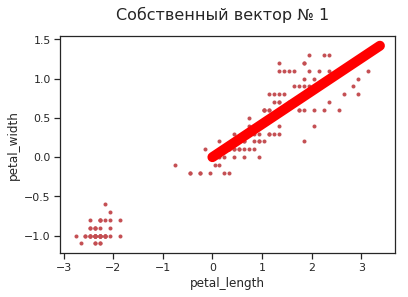

Собственное значение:  0.04 Собственный вектор:  [-0.38771882  0.92177769]


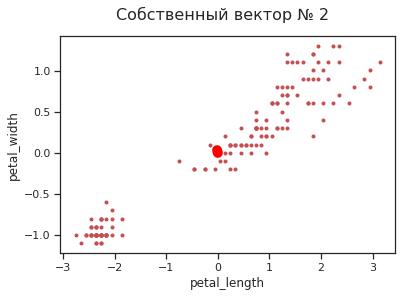

In [147]:
import numpy.linalg as la
import math
from sklearn.preprocessing import StandardScaler
petal_length = iris['petal_length']
petal_width = iris['petal_width']
mean1 = statistics.mean(petal_length)
petal_length -= mean1
mean2 = statistics.mean(petal_width)
petal_width -= mean2
Y = np.vstack((petal_length, petal_width)).T
w,v = la.eig(np.cov(Y.T))

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(petal_length, petal_width, 'r.', zorder=1)
    print('Собственное значение: ', round(w[i],2), 'Собственный вектор: ', v[:,i])
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    plt.plot([mean1, mean1+w[i]*v[:,i][0]], [mean2, mean2 +w[i] * v[:,i][1]],color='red', linewidth=10)
    plt.show()

Собственные вектора показывают, в каком направлении перекошена корреляция выборки. Первый собственный вектор показывает направление, в котором максимальный перекос. Второй собственный вектор - направлении с меньшим перекосом. Второй собственный вектор также перпендикулярен первому собственному вектору. Если взять три выборки, то можно посчитать третий собственный вектор. Он будет перпендикулярен двум предыдущим, а также будет показывать направление наименьшего перекоса из двух предыдущих.

# Геометрический смысл собственного вектора. 

Собственный вектор показывает **направление** наибольшего разброса выборки.

При **проецировании** всех точек на собственный вектор разброс данных получается максимальным.

Ниже рассмотрен пример проецирования заданных точек некой выборки на прямую, заданную вектором **v** = (3,2). 

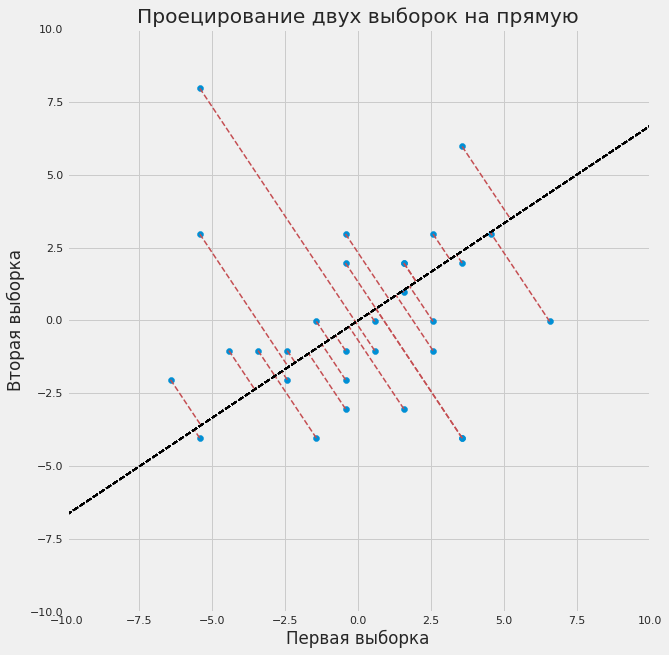

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.preprocessing import StandardScaler


A = np.array([[10,8],[1,2],[7,5],[3,5],[7,6],[8,7],[9,9],[4,5],[6,5],[6,8],
             [1,9],[10,2],[6,3],[2,5],[1,14],[8,8],[9,5],[4,4],[5,6],[8,8],
             [11,9],[10,12],[6,4],[5,2],[10,2],[8,3],[6,9],[0,4],[13,6],[9,6]])
# Нормализуем данные
A = StandardScaler(with_std=False,copy=False).fit_transform(A)

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_aspect('equal')
ax0.set_xlim((-10,10))
ax0.set_ylim((-10,10))

ax0.scatter(A[:,0],A[:,1])


for i in range(len(A[:,0])):

    # строим прямую v
    v = np.array([3,2])
    ax0.plot(np.linspace(-10,10),np.linspace(-10,10)*(v[1]/v[0]),color='black',linestyle='--',linewidth=1.5)   

    # 2 выборки заданы в векторе A. Построим точку w из текущего значения двух выборок
    w = np.array([A[i][0],A[i][1]])

    # строим проекцию данной точки w на вектор v: cv
    cv = (np.dot(w,v))/np.dot(v,np.transpose(v))*v

    # линия между v и cv
    ax0.plot([w[0],cv[0]],[w[1],cv[1]],'r--',linewidth=1.5)


    # проверить результат
#    print(np.dot((w-cv),cv))
plt.xlabel('Первая выборка')
plt.ylabel('Вторая выборка')
plt.title('Проецирование двух выборок на прямую')
plt.show()

# Нормальное распределение. Правило трех сигм.

Возьмем выборку sepal_width датасета ирисов:

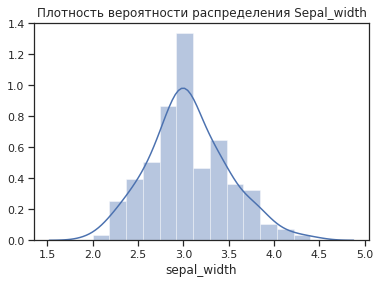

In [11]:
sepal_width = iris['sepal_width']
sns.distplot(sepal_width)
plt.title('Плотность вероятности распределения Sepal_width')
plt.show()

По графику можно определить, что выборка является нормальной.

Правило трех сигм гласит, что вероятность того, что случайная величина отклонится от своего математического ожидания более, чем на три среднеквадратических отклонений, практически равна 0. 

Посчитаем математическое ожидание для выборки.



In [14]:
statistics.mean(sepal_width)

3.0573333333333332

Посчитаем среднеквадратическое отклонение:

In [13]:
statistics.pstdev(sepal_width)

0.43441096773549454

Посчитаем количество элементов, лежащих в промежутке, выходящем за интервалы mean +/- 3*sigma, где sigma - среднеквадратическое отклонение, mean - мат ожидание

In [17]:
mean = statistics.mean(sepal_width)
sigma = statistics.pstdev(sepal_width)
count_left = sepal_width[sepal_width<=mean-3*sigma].count()
print('Количество элементов меньше mean-3*sigma: ', count_left)
count_right = sepal_width[sepal_width>=mean+3*sigma].count()
print('Количество элементов больше mean+3*sigma: ', count_right)

Количество элементов меньше mean-3*sigma:  0
Количество элементов больше mean+3*sigma:  1


Посчитаем количество элементов, лежащих в промежутке, выходящем за интервалы mean +/- 2*sigma:

In [27]:
count_left = sepal_width[sepal_width<=mean-2*sigma].count()
count_right = sepal_width[sepal_width>=mean+2*sigma].count()
count_all = count_right+count_left
print('Количество элементов за пределеами mean-/+2*sigma: ', count_all)
print('В процентном соотношении: ', count_all/len(sepal_width))


Количество элементов за пределеами mean-/+2*sigma:  5
В процентном соотношении:  0.03333333333333333


Количество элементов, лежащих в промежутке от [mean-sigma; mean+sigma]:

In [28]:
count_left = sepal_width[sepal_width<=mean-sigma].count()
count_right = sepal_width[sepal_width>=mean+sigma].count()
count_all = count_right+count_left
print('Количество элементов за пределеами mean-/+sigma: ', count_all)
print('В процентном соотношении: ', count_all/len(sepal_width))

Количество элементов за пределеами mean-/+sigma:  49
В процентном соотношении:  0.32666666666666666


# Некоторые ловушки корреляции

Корреляция не всегда линейна

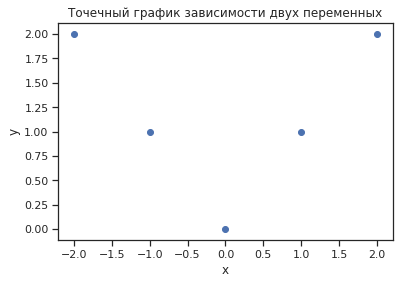

In [32]:
x = [-2,-1,0,1,2]
y = [2,1,0,1,2]
plt.scatter(x,y)
plt.title('Точечный график зависимости двух переменных')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [36]:
corr, p_value = pearsonr(x, y)
print('Коэффициент Пирсона: ', corr)

Коэффициент Пирсона:  5.551115123125783e-17


# Пример избавления от выбросов:

In [0]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
avocado=pd.read_csv(url, index_col=0)
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Масштабирование

In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(avocado[['Small Bags', 'Large Bags']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0 -0.998714 -0.999967
1 -0.998594 -0.999966
2 -0.998798 -0.999964
3 -0.999152 -0.999953
4 -0.999105 -0.999931


In [0]:
small_bags = df_norm[0]
large_bags = df_norm[1]

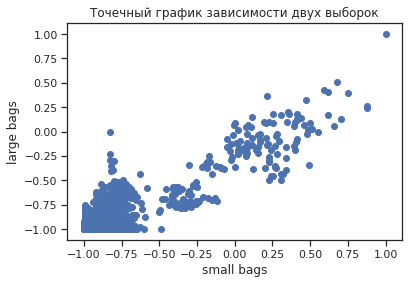

In [0]:
plt.xlabel('small bags')
plt.ylabel('large bags')
plt.scatter(small_bags, large_bags)
plt.title('Точечный график зависимости двух выборок')
plt.show()

Удалить 10% выбросов по краям: **усеченное среднее**

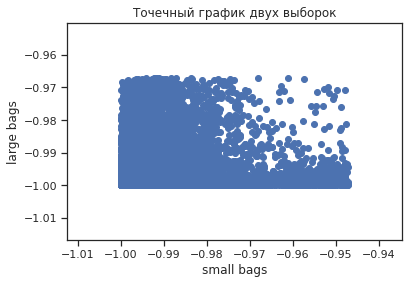

In [0]:
x1 = int(len(small_bags)*0.1)
x2 = int(len(small_bags)*0.9)
sm = sorted(np.array(small_bags))[x1:x2]
min_small = min(sm)
max_small = max(sm)
lg = sorted(np.array(large_bags))[x1:x2]
min_large = min(lg)
max_large = max(lg)
x_new = small_bags[(small_bags >= min_small) & (small_bags <= max_small)]
y_new = large_bags[(large_bags >= min_large) & (large_bags <= max_large)]
length = min(len(x_new), len(y_new))
plt.scatter(x_new[:length], y_new[:length])
plt.xlabel('small bags')
plt.ylabel('large bags')
plt.title('Точечный график двух выборок')
plt.show()

Посмотрим частотный график данных для large_bags

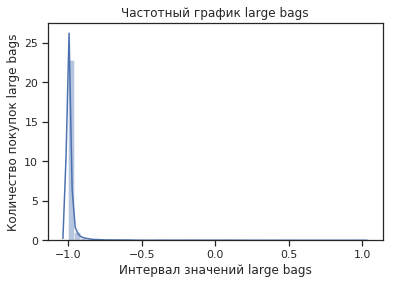

In [0]:
sns.distplot(large_bags)
plt.xlabel('Интервал значений large bags')
plt.ylabel('Количество покупок large bags')
plt.title('Частотный график large bags')
plt.show()

Данное распределение возможно имеет выбросы (значения от 0 до 1). Попробуем нарисовать график без выбросов

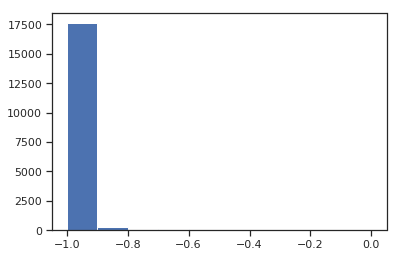

In [0]:
plt.hist(large_bags[large_bags<0])
plt.show()

Посмотрим разброс данных для small_bags

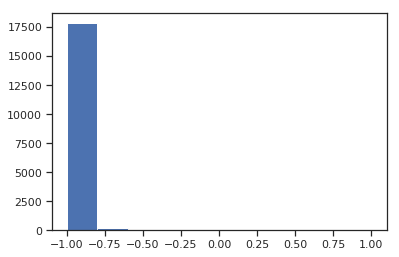

In [0]:
plt.hist(small_bags)
plt.show()

Данное распределение очень похоже на геометрическое распределение и логнормальное

Но геометрическое распределение для дискретных величин, в начшем случае это непрерывная величина. Значит, это скорее логнормальное распределение. 

Генерация логнормального распределения с помощью python

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


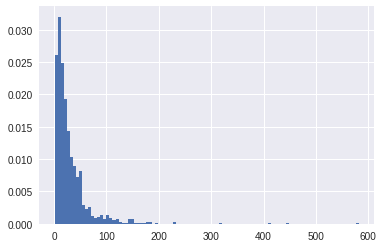

In [0]:
mu, sigma = 3., 1. # среднее значение и отклонение
s = np.random.lognormal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 100, normed=True, align='mid')

Мы можем сделать вывод, что распределение задаётся плотностью вероятности, имеющей вид:
$$p(x)=\frac{1}{\sigma x\sqrt{2\pi }}e^{-\frac{(ln(x)-\mu )^{2}}{2\sigma^{2}}}$$

где $\mu$ это среднее значение, а $\sigma$ стандартное отклонение нормального распределения логарифма. 

# Дискретные распределения

**Распределение Бернулли**

In [0]:
p = 0.3
mean, var, skew, kurt = stats.bernoulli.stats(p, moments='mvsk')

Бернулли возвращает значения либо 1, либо 0. Чтобы сгенерировать 10000 случайных чисел Бернулли с вероятностью успеха p =0.3, мы будем использовать bernoulli.rvs с 2мя аргументами.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


[Text(0, 0.5, 'Вероятность'), Text(0.5, 0, 'Бернулли')]

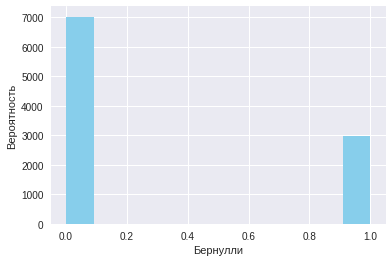

In [0]:
# import seaborn
import seaborn as sns
data_bern = stats.bernoulli.rvs(size=10000,p=0.3)
ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Бернулли', ylabel='Вероятность')

**Пример** подбрасывание монеты

In [0]:
rng = np.random.RandomState(123)

coin_flips = rng.randint(0, 2, size=1000)
heads = np.sum(coin_flips)
heads

520

С увеличением числа выборки вероятность увеличивается

In [0]:
rng = np.random.RandomState(123)

for i in range(7):
    num = 10**i
    coin_flips = rng.randint(0, 2, size=num)
    heads_proba = np.mean(coin_flips)
    print('Вероятность выпадения решки: %.2f' % (heads_proba*100))

Вероятность выпадения решки: 0.00
Вероятность выпадения решки: 40.00
Вероятность выпадения решки: 47.00
Вероятность выпадения решки: 53.70
Вероятность выпадения решки: 49.53
Вероятность выпадения решки: 49.80
Вероятность выпадения решки: 50.03


Вероятностное распределение в 1000 подбрасываний

1 experiment with coin flips:  [1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1
 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0]


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


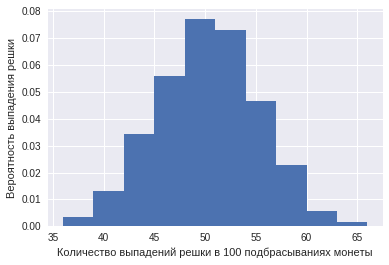

In [0]:
n_experiments = 1000
n_bernoulli_trials = 100

rng = np.random.RandomState(123)
outcomes = np.empty(n_experiments, dtype=np.float)

for i in range(n_experiments):
    num = 10**i
    coin_flips = rng.randint(0, 2, size=n_bernoulli_trials)
    # coin_flips - выборка из 100 подбрасываний
    head_counts = np.sum(coin_flips)
    outcomes[i] = head_counts

print('1 experiment with coin flips: ', coin_flips)
plt.hist(outcomes, normed=True)
plt.xlabel('Количество выпадений решки в 100 подбрасываниях монеты')
plt.ylabel('Вероятность выпадения решки')
plt.show()

# Биномиальное распределение

Обобщение распределения Бернулли

In [0]:
data_binom = stats.binom.rvs(n=10,p=0.8,size=10000)

Рассматриваем n экспериментов с вероятностью успеха p

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


[Text(0, 0.5, 'Частота (плотность)'),
 Text(0.5, 0, 'Биноминальное распределение')]

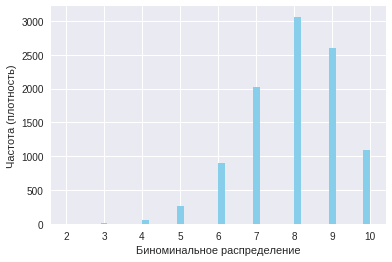

In [0]:
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Биноминальное распределение', ylabel='Частота (плотность)')

# Геометрическое распределение

Геометри́ческое распределе́ние в теории вероятностей — распределение дискретной случайной величины, равной количеству испытаний случайного эксперимента до наблюдения первого «успеха». 
Пусть $X_{1},...X_{n}$ - бесконечная последовательность независимых случайных величин с распределением Бернулли, то есть
$$X_{i} = \left \{ \begin{matrix}
1, & p & \\ 
0, & q=1-p & i = 1,2,.. 
\end{matrix} \right.$$
Построим случайную величину ${\displaystyle Y=\min \left\{i\mid X_{i}=1\right\}-1}$ — количество «неудач» до первого «успеха». Распределение случайной величины Y называется геометрическим с вероятностью «успеха» p, что обозначается следующим образом:  $Y\sim \mathrm {Geom} (p)$.
Функция вероятности случайной величины Y имеет вид:

${\displaystyle \mathbb {P} (Y=n)=q^{n}p,\;n=0,1,2,\ldots } $

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13  15  18
row_0                                                                      
counts  5027  2482  1316  590  310  133  76  35   9  13   2   3   2   1   1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f861df10be0>]],
      dtype=object)

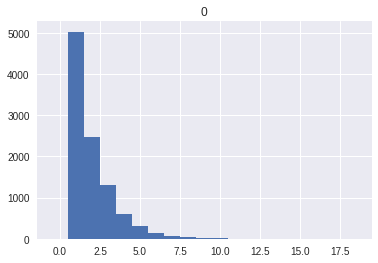

In [0]:
import random
random.seed(12)

flips_till_heads = stats.geom.rvs(size=10000,  # сгенерировать дату
                                  p=0.5)       # с вероятностью успеха 0.5

# Напечатать данные
print( pd.crosstab(index="counts", columns= flips_till_heads))

# Частотная зависимость
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1)

График распределения похож на то, что мы ожидаем: очень вероятно получить значение решки за одно или два подкидывания монеты, и маловероятно получить только за 5 подкидываний. В 10000 сгенерированных подкидываний, самое максимальное занимает 13 подкидываний, чтобы получить решку. 

# Распределение Стьюдента



Получение информации о распределении


*  loc - положение центра выборки (на сколько смещена относительно центра)
*  scale - масштабирование выборки (разброс)
*  skew - коэффицие́нт асимметри́и в теории вероятностей — величина, характеризующая асимметрию распределения данной случайной величины: положительное - выборка наклонена вправо, отрицательная - влево

![skew](https://pp.userapi.com/c851536/v851536486/ffb71/uFExpi7Pxvs.jpg)
*  kurt - коэффицие́нт эксце́сса - мера остроты пика

![kurt](https://pp.userapi.com/c851536/v851536486/ffb82/sRWYxq1SCR0.jpg)



In [0]:
from scipy.stats import t

# Количество выборки df=20, loc=0, scale=1 stats() для вычисления среднего, разброса, 
# негативное skew показывает, что выборка сдвинута влево, положительное - что сдвинута вправо
#
rv = t(df=20, loc=0, scale=1)
mean, var, skew, kurt = rv.stats(moments='mvsk')
mean, var, skew, kurt

(array(0.), array(1.11111111), array(0.), array(0.375))

График плотности распределения

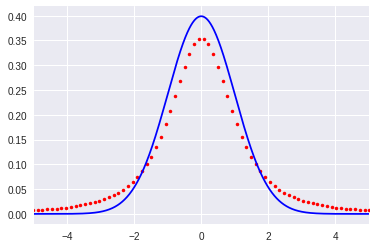

In [0]:
rv = t(df=2, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 1000)
y = rv.pdf(x) 

x1 = np.linspace(-5,5,1000)   
y1 = norm.pdf(x1)              

plt.xlim(-5,5)
plt.legend(['Нормальное распределение', 'Стьюдента'])
plt.plot(x,y,'r.')
plt.plot(x1,y1,'b')
plt.show()

Вероятность перехода пороговой границы 

In [0]:
a = 0.05  # задать порог

rv = t(df=20, loc=0, scale=1)
x = np.random.normal(size=1)

p = rv.sf(x) # задаем

if p < a:
    print('Вероятность перехода пороговой граицы: ', x, p)
else:
    print('Вероятность не успеха', x, p)

Вероятность не успеха [0.08689415] [0.46580987]


# Проверка гипотезы t-критерия Стьюдента

In [0]:
url='http://yustiks.ru/bog_clean.csv'
s=requests.get(url).content
# данные о такси в городе Богота
taxi_bog=pd.read_csv(io.StringIO(s.decode('utf-8')))

# данные о такси в городе Мексико
url='http://yustiks.ru/mex_clean.csv'
s=requests.get(url).content
taxi_mex = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [0]:
taxi_bog.head(4)

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,Bogotá,2016-09-18 01:54:11,2016-09-18 02:17:49,-74.170353,4.622699,-74.119259,4.572322,N,1419,11935,293
1,2,Bogotá,2016-09-18 03:31:05,2016-09-18 03:44:06,-74.123542,4.604075,-74.116125,4.572578,N,782,7101,139
2,3,Bogotá,2016-08-07 03:35:36,2016-09-18 04:30:31,-74.178643,4.646176,-74.178711,4.646367,N,3632095,2655,2534
3,4,Bogotá,2016-09-18 04:31:13,2016-09-18 04:32:19,-74.163398,4.641949,-74.165813,4.640649,N,66,318,52


Посмотрим, как распределены переменные для города Богота

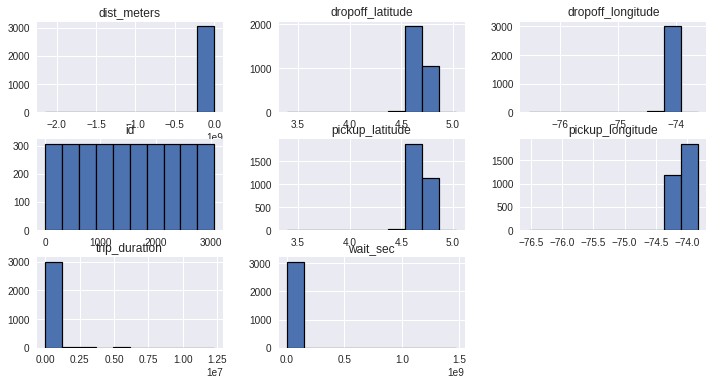

In [0]:
taxi_bog.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Посмотрим как распределены переменные для Мексики

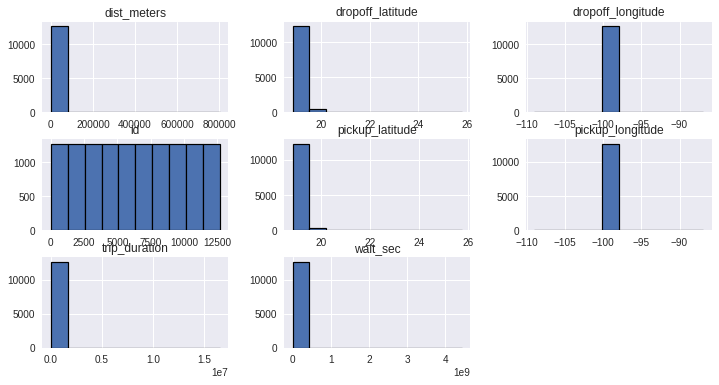

In [0]:
taxi_mex.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Рассмотрим две выборки $X$ и $Y$, и мы хотим сравнить их средние значения $\mu_x$ и $\mu_y$

Тогда рассматривается нулевая гипотеза:
$$
H_0: \mu_x = \mu_y
$$
и альтернативная:

$$
H_1: \mu_x \ne \mu_y.
$$

 Тест измеряет насколько среднеквадратичное значение меняется среди выборок. Если мы получаем высокое p-value, например, выше 0.05 или 0.1, тогда мы не можем отвергнуть нулевую гипотезу о том, что среднее значения идентичны. Если p-value меньше, чем 1% (или 5%), то мы отвергаем нулевую гипотезу.

# Одновыборочный t-критерий

$$t = \frac{\overline X - m}{s_X / \sqrt{n}}$$

In [0]:
sample = taxi_mex['wait_sec'].sample(n=3000)/60
stats.ttest_1samp(sample, 10)

Ttest_1sampResult(statistic=3.871393158090519, pvalue=0.00011052293559141394)

# Двухвыборочный критерий для независимых выборок

$$t = \frac{\overline X_1 - \overline X_2}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$$

In [0]:
taxi_mex['pickup_datetime'] = pd.to_datetime(taxi_mex.pickup_datetime)
taxi_mex['month'] = taxi_mex['pickup_datetime'].dt.month

In [0]:
taxi_bog.shape

(3063, 12)

In [0]:
taxi_mex.shape

(12694, 13)

Длительность поездок - отличается ли средняя длительность поездки по Мехико от средней поездки по Боготе?

In [0]:
stats.ttest_ind(taxi_mex['trip_duration'].sample(n=3000), taxi_bog['trip_duration'].sample(n=3000))

Ttest_indResult(statistic=-6.137592389348267, pvalue=8.913996732762836e-10)

p-value меньше уровня значимости, а это означает, что мы отвергаем нулевую гипотезу, и выборки имеют разные средние

А вот в случае ожидания времени такси мы уже не можем отвергнуть нулевую гипотезу

In [0]:
stats.ttest_ind(taxi_mex['wait_sec'].sample(n=3000), taxi_bog['wait_sec'].sample(n=3000))

Ttest_indResult(statistic=-0.6501376233763239, pvalue=0.5156282279146618)

# Критерий Фишера

Допустим, мы посчитали количество китов и акул в Атлантическом и Индийском океанах. В Атлантическом мы нашли 8 китов и 1 акулу, в Индийском океане 2 кита и 5 акул. Таблица выглядит как:

|  | Атлантический | Индийский |
| --- | --- | --- |
| киты | 8 | 2 |
| киты | 1 | 5 |


Мы используем эту таблицу чтобы найти p-value

In [0]:
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[8, 2], [1, 5]])
pvalue

0.03496503496503495

P-value примерно равно 3.5%. Обычно пороговый уровень значимости примерно 5% - если мы используем данный порог, то можно сделать вывод, что рассматриваемая выборка имеет статистическую значимость: киты предпочитают Атлантический океан, а акулы предпочитают Индийский океан

# Другие методы тестирования

https://en.wikipedia.org/wiki/A/B_testing - примеры других критериев

# Решение проблем классификации

Сгенерируем 2 класса выборок с разными средними значениями $m1 = \begin{bmatrix}0\\2 \end{bmatrix}$ и $m2 = \begin{bmatrix}1,7\\2.5\end{bmatrix}$ и одинаковой матрицей ковариаций $C = \begin{bmatrix}
2 & 1\\ 
1 & 2
\end{bmatrix}$

In [0]:
cov1 = cov2 = np.array([[2, 1], [1, 2]] )
m1 = np.array([0, 2])
m2 = np.array([1.7, 2.5])
N = 200

Нарисуем контуры данных выборок (3 контура для каждой выборки)

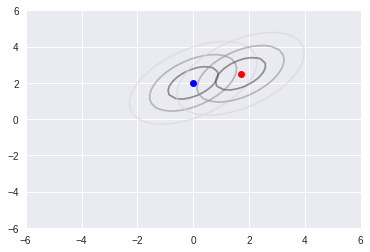

In [0]:
from scipy.stats import multivariate_normal as mvn
nGrid = 50
x1, y1 = np.meshgrid(np.linspace(-6,6,nGrid),np.linspace(-6,6,nGrid))
s1 = np.column_stack([x1.flat, y1.flat])

x2, y2 = np.meshgrid(np.linspace(-6,6,nGrid),np.linspace(-6,6,nGrid))
s2 = np.column_stack([x2.flat, y2.flat])

plt.plot(m1[0], m1[1], 'bo')
plt.plot(m2[0], m2[1], 'ro')

# Графики распределений
z1 = mvn.pdf(s1, m1, cov1).reshape(x1.shape)
z2 = mvn.pdf(s2, m2, cov2).reshape(x2.shape)
# рисуем контуры для распределений
plt.contour(x1, y1, z1, 3, alpha=0.6)
plt.contour(x2, y2, z2, 3, alpha=0.6)

# plt.xlim(-4, 5)
# plt.ylim(-2, 6)

Сгенерируем данные для двух выборок с разными средними значениями, но одинаковыми разбросами

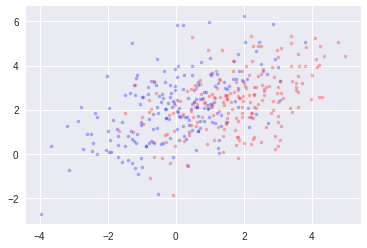

In [0]:
data1 = np.column_stack(np.random.multivariate_normal(m1, cov1, N))
data2 = np.column_stack(np.random.multivariate_normal(m2, cov2, N))

scatter1 = plt.plot(data1[0], data1[1], 'b.', alpha=0.3)
scatter2 = plt.plot(data2[0], data2[1], 'r.', alpha=0.3)

# plt.show()


Посчитать вектор направления Фишера используя средние значения и матрицу ковариаций, и постройте график на плоскости. 

Text(0.5, 1.0, 'Выборки и вектор Фишера')

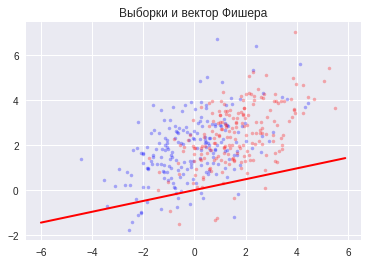

In [0]:
from numpy.linalg import inv as inv
data1 = np.column_stack(np.random.multivariate_normal(m1, cov1, N))
data2 = np.column_stack(np.random.multivariate_normal(m2, cov2, N))

scatter1 = plt.plot(data1[0], data1[1], 'b.', alpha=0.3)
scatter2 = plt.plot(data2[0], data2[1], 'r.', alpha=0.3)
wF = inv(cov1 + cov2).dot(m1.T-m2.T)
xx = np.arange(-6,6,0.1)
yy = -xx.dot(wF[1]/wF[0])
fisher_line = plt.plot(xx, yy, 'r', linewidth=2)
plt.title("Выборки и вектор Фишера")

Спроецируем данные по направлению вектора Фишера и нарисуйте частотные диаграммы разбросов проекций

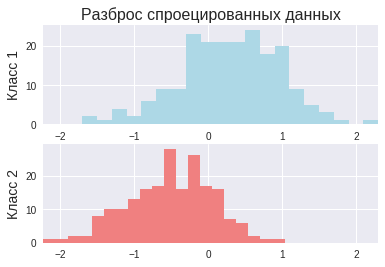

In [0]:
proj1 = data1.T.dot(wF)
proj2 = data2.T.dot(wF)

min_scale = min([min(proj2), min(proj1)])
max_scale = max([max(proj2), max(proj1)])

plt.subplot(211)
plt.hist(proj1, 20, color='lightblue')
plt.title('Разброс спроецированных данных', fontsize=16)
plt.ylabel('Класс 1', fontsize=14)
plt.xlim([min_scale, max_scale])

plt.subplot(212)
plt.hist(proj2, 20, color='lightcoral')
plt.ylabel('Класс 2', fontsize=14)
plt.xlim([min_scale, max_scale])

plt.show()